In [1]:
#Imports
import pandas as pd
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt 
from matplotlib import rc
import data_prep as dp
from sklearn.metrics import adjusted_rand_score

In [2]:
# sequence distance matrix
data_path = 'data/Matched_gene_sequences_matrix.csv'
#data_path = 'data/Human_protein_distance_matrix.csv'
df = pd.read_csv(data_path, delimiter=',', index_col=0).sort_values(by=['Gene'])
df = df[sorted(list(df.columns.values))]
#hotfix TODO: check whats up with that gene
df = df.drop('CHK1')
df = df.drop('CHK1', axis=1)
df

,AKT1,AKT2,ARAF,ATM,ATR,AurB,BRAF,BUB1,CDC7,CDK2,...,RSK2,RSK3,SGK1,SRC,SRPK1,TLK2,TTK,ULK1,VRK1,p38a
Gene,,,,,,,,,,,,,,,,,,,,,
AKT1,0,24,176,190,188,159,182,201,201,171,...,126,125,113,181,207,174,171,163,173,166
AKT2,24,0,180,186,189,160,187,199,204,171,...,127,124,115,182,211,174,172,163,174,165
ARAF,176,180,0,189,202,183,59,219,221,189,...,164,162,178,180,186,190,167,168,174,180
ATM,190,186,189,0,238,190,188,198,198,219,...,215,215,196,188,180,192,188,202,196,231
ATR,188,189,202,238,0,192,205,204,215,229,...,210,213,198,194,202,195,192,204,191,234
AurB,159,160,183,190,192,0,187,206,202,171,...,143,140,166,184,202,175,174,161,176,172
BRAF,182,187,59,188,205,187,0,222,220,195,...,170,171,184,176,185,192,174,170,171,179
BUB1,201,199,219,198,204,206,222,0,209,209,...,183,184,207,212,197,206,201,200,178,202
CDC7,201,204,221,198,215,202,220,209,0,201,...,179,181,208,198,348,207,183,190,168,197


In [3]:
# converting redundant distance matrix to condensed matrix
condensed_matrix = ssd.squareform(df)
condensed_matrix.shape

(1431,)

(53, 4)


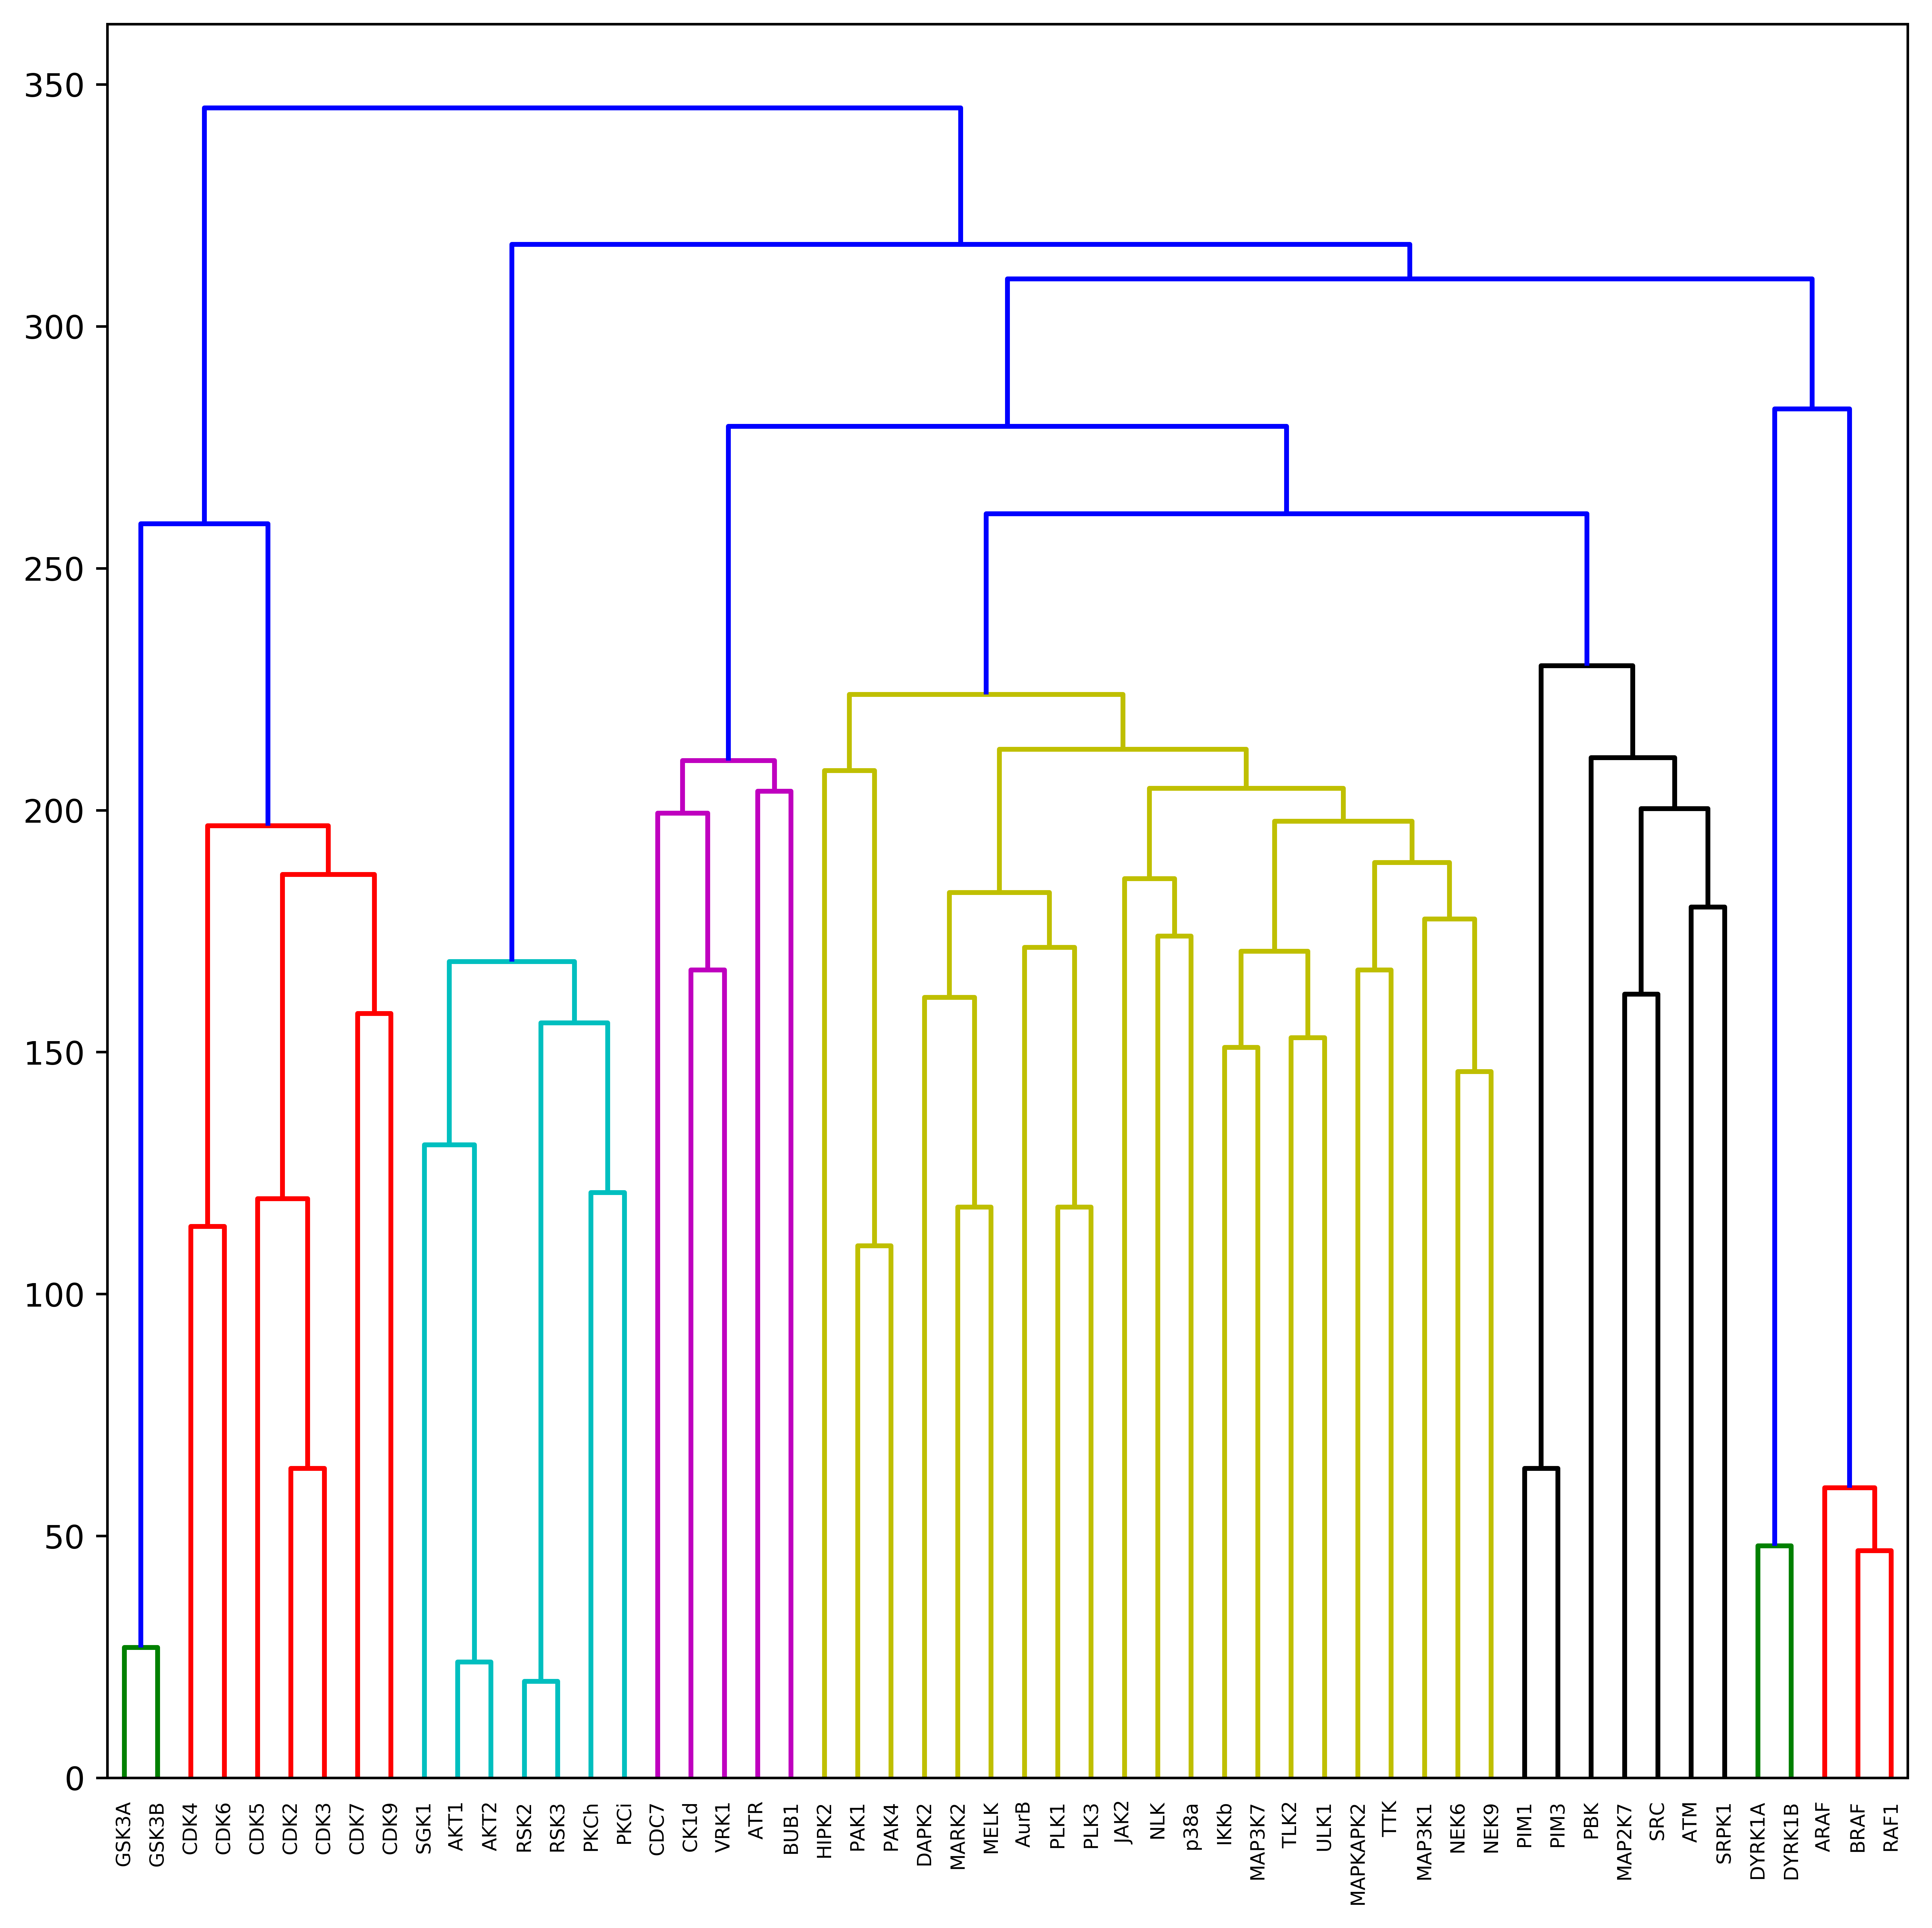

In [4]:
# ## Hierarchical clustering of the condensed matrix
H = linkage(condensed_matrix, 'ward')
print(H.shape)
fig = plt.figure(figsize=(10, 10), dpi=720)

dn1 = dendrogram(H, labels=df.index)

plt.savefig('png/sequence_clustering.png')

In [5]:
# sequence distance matrix
data_path = 'data/matched_phosphorylation_dist_matrix.csv'
#data_path = 'data/Human_protein_distance_matrix.csv'
df = pd.read_csv(data_path, delimiter=',', index_col=0)
#df = df[sorted(list(df.columns.values))]

df

,AKT1,AKT2,ARAF,ATM,ATR,AurB,BRAF,BUB1,CDC7,CDK2,...,RAF1,RSK3,RSK2,SGK1,SRC,SRPK1,TLK2,TTK,ULK1,VRK1
AKT1,0,0,475,20,143,532,684,4,74,550,...,588,392,595,327,227,24,43,81,610,522
AKT2,0,0,56,15,182,87,55,35,11,60,...,29,178,26,87,6,59,4,13,28,43
ARAF,475,56,0,285,521,226,575,0,16,223,...,967,829,337,651,56,3,21,7,391,190
ATM,20,15,285,0,295,0,98,139,42,12,...,223,284,27,280,111,263,25,1,7,24
ATR,143,182,521,295,0,79,296,94,201,284,...,454,676,223,608,19,13,188,49,283,185
AurB,532,87,226,0,79,0,475,65,33,507,...,285,303,263,72,69,89,77,152,161,252
BRAF,684,55,575,98,296,475,0,1,179,731,...,618,607,535,581,9,5,73,110,456,621
BUB1,4,35,0,139,94,65,1,0,71,14,...,1,0,172,17,156,194,107,63,252,137
CDC7,74,11,16,42,201,33,179,71,0,428,...,31,44,107,206,0,0,160,238,132,261
CDK2,550,60,223,12,284,507,731,14,428,0,...,271,360,532,361,16,14,233,370,400,746


In [6]:
# converting redundant distance matrix to condensed matrix
condensed_matrix = ssd.squareform(df)
condensed_matrix.shape

(1431,)

(53, 4)


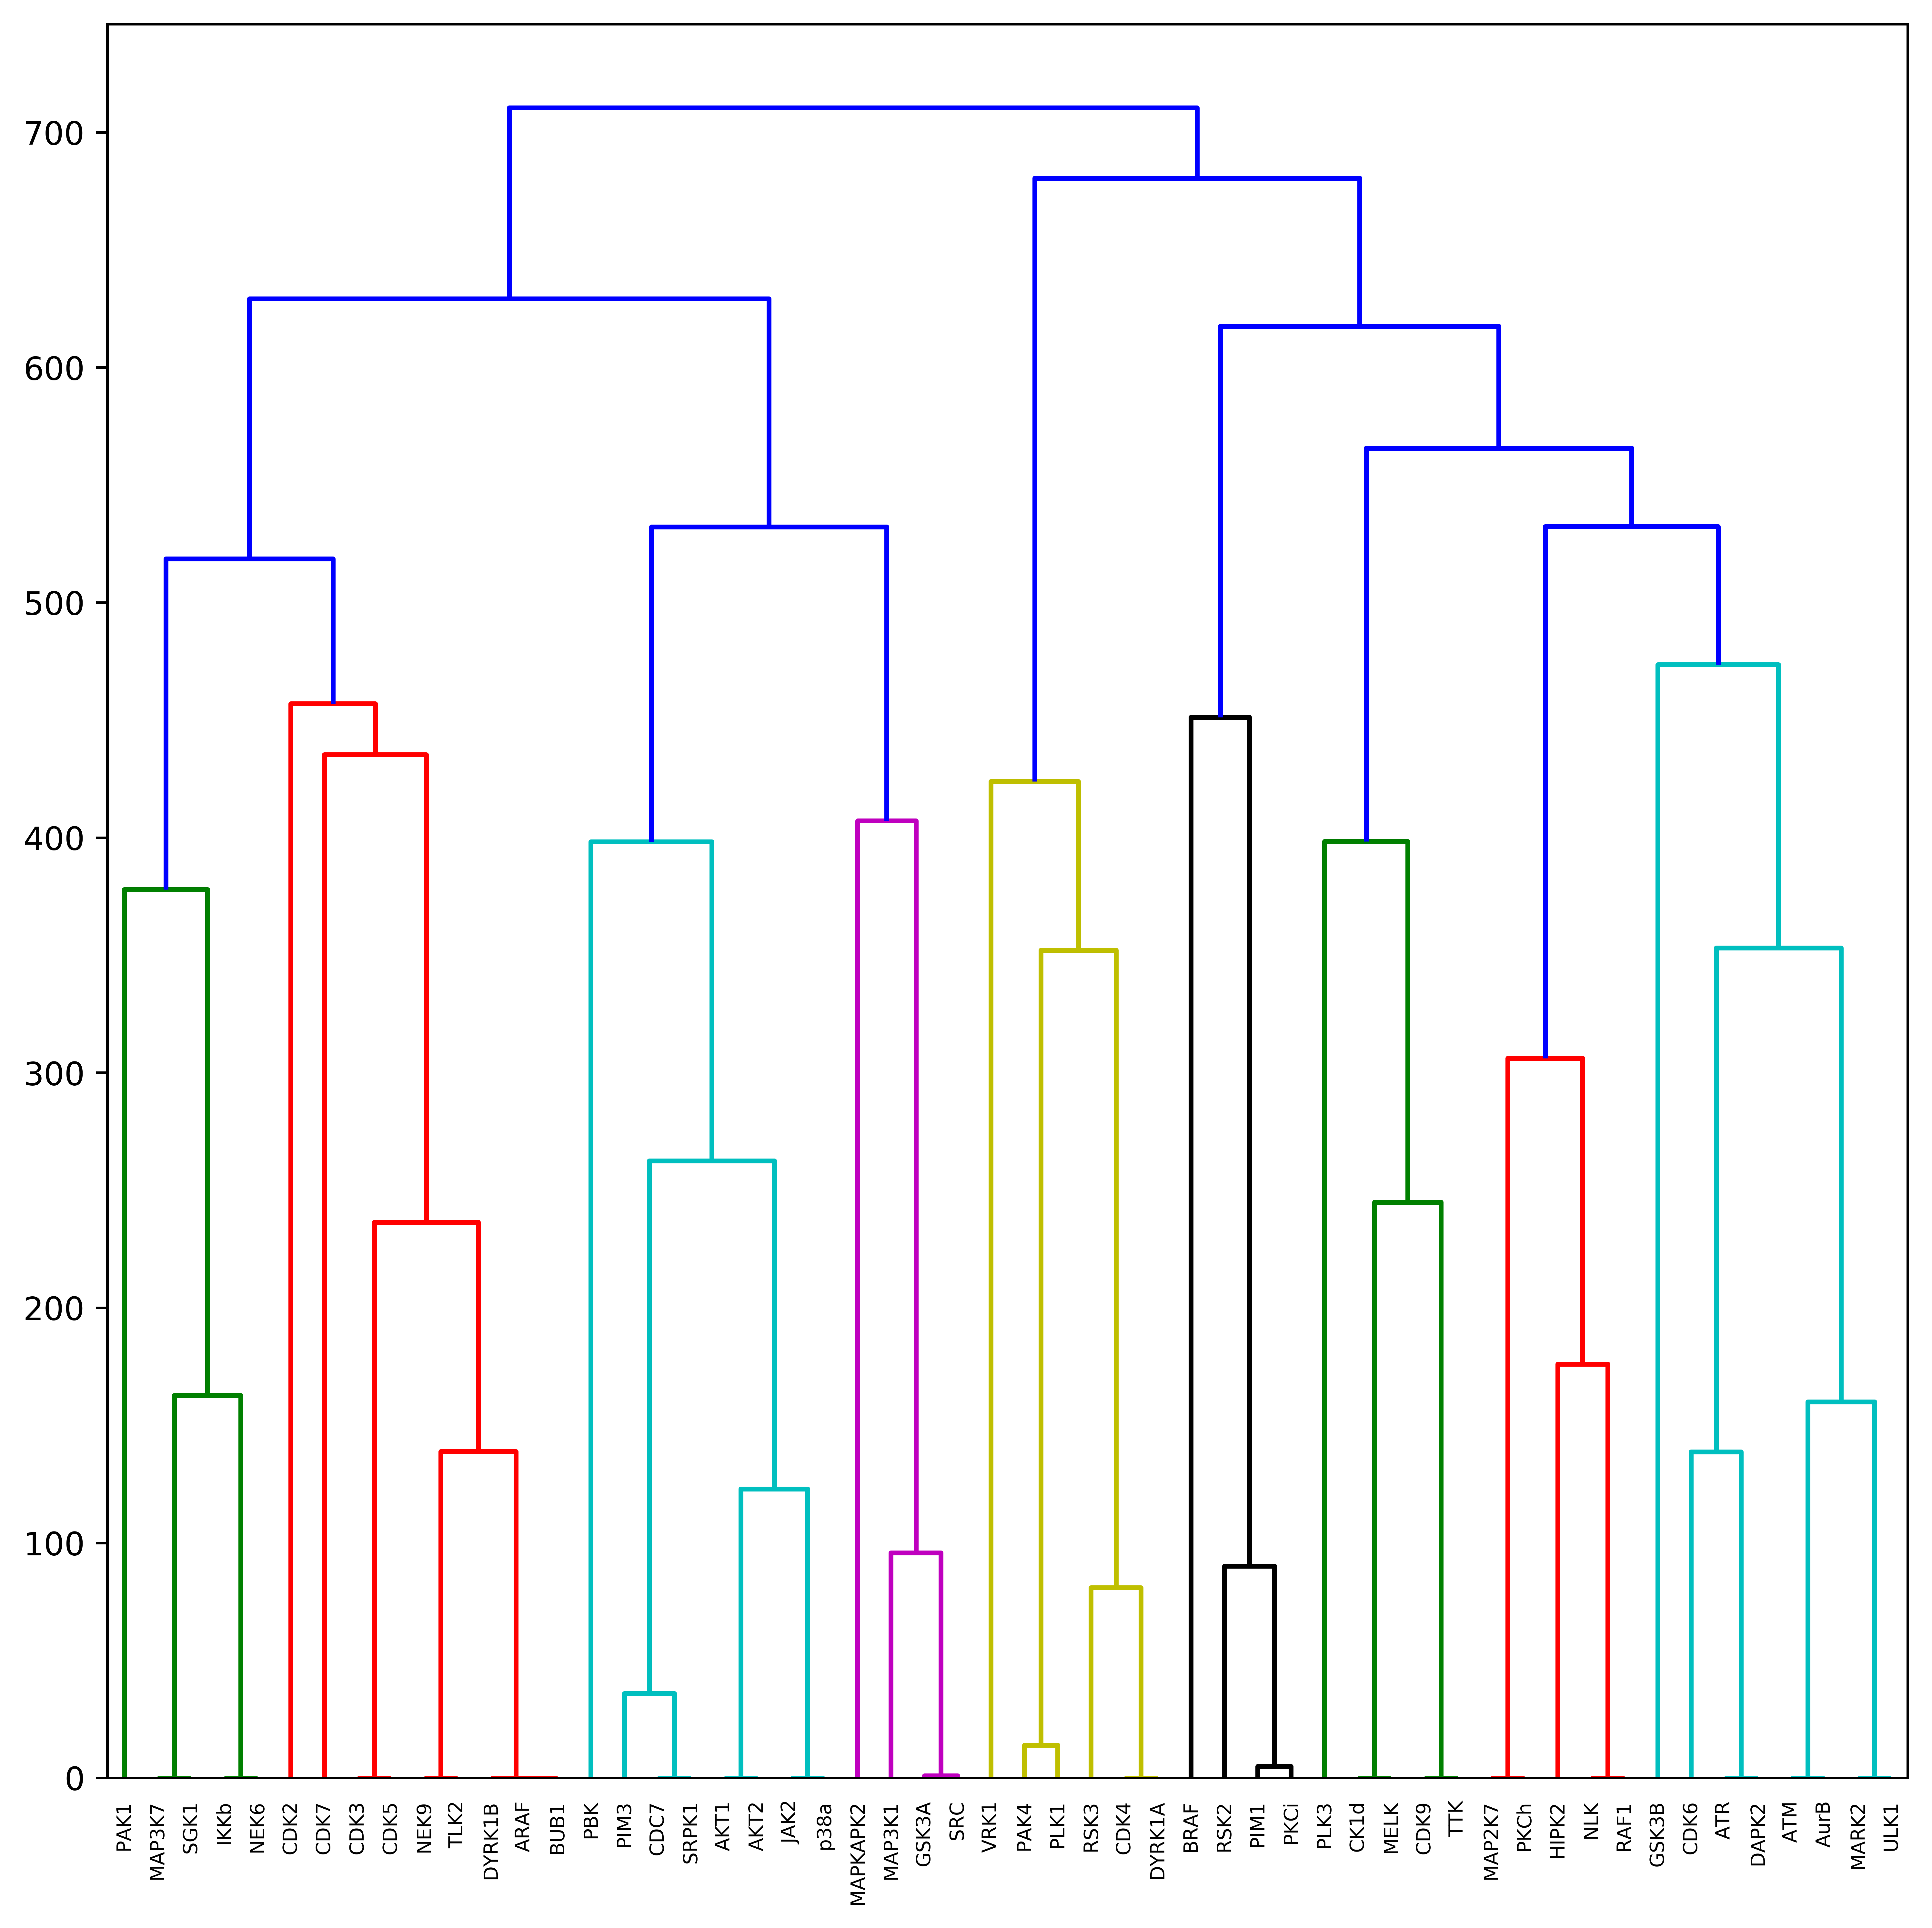

In [7]:
# ## Hierarchical clustering of the condensed matrix
H = linkage(condensed_matrix, 'ward')
print(H.shape)
fig = plt.figure(figsize=(10, 10), dpi=720)

dn2 = dendrogram(H, labels=df.index)

plt.savefig('png/phospho_clustering.png')

In [8]:
similarity_score = adjusted_rand_score(x, preds)
similarity_score

NameError: name 'x' is not defined